# Kaggle Titanic - Machine Learning From Disaster

Objet du projet : Créer un modèle qui prédit la survie ou non dans la catastrophe du titanic.

Algorithmes utilisés : Régression logistique, bayesien naïf ou arbre de décision.

Nom des données : 

> PassengerID/ID : Identifiant du passager (entre 1 et 1309)

> Survived : Survivant (1) ou non (0)

> Pclass/Classe : Classe du passager (1 = 1ère classe, 2 = 2ème classe, 3 = 3ème classe)

> Name : Nom et titre du passager (Nom, titre, prénoms)

> Sex : Sexe du passager ('male' ou 'female')

> Age : Age du passager (Décimal si inférieur à 1,  estimé si 'xx.5')

> SibSp/Horizontal : Nb d'époux, de frères ou de soeurs présents on bord

> Parch/Vertical : Nb de parents ou d'enfants présents on board

> Ticket : N° Ticket

> Fare/Price : Prix du ticket (prix indiqué en livre et pour un seul achat (peut correspondre à plusieurs tickets)

> Cabin : N° Cabine (forme 'A123')

> Embarked : Part d'embarcation (C = Charbourg, Q = Queenstown, S = Southampton)

***Etapes :*** 

> Etape 1 - Visualisation 

> Etape 2 - Feature engineering

> Etape 3 - Modelling

> Etape 4 - Difficulties/Explanation

In [1]:
# Analyse des datas
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
kaggle = pd.read_csv('test.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train = train.rename(index=str, columns={"Pclass": "Class", 
                                 "SibSp": "Horizontal",
                                 "Parch": "Vertical",
                                 "Fare": "Price"})
kaggle = kaggle.rename(index=str, columns={"Pclass": "Class", 
                                 "SibSp": "Horizontal",
                                 "Parch": "Vertical",
                                 "Fare": "Price"})

# Etape 1 - Visualisation

In [5]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

> ***Corrélation***

In [6]:
correlation = train.corr()
correlation

,PassengerId,Survived,Class,Age,Horizontal,Vertical,Price
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Class,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
Horizontal,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Vertical,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Price,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


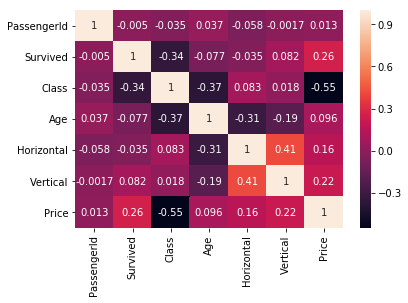

In [7]:
import seaborn as sb
sb.heatmap(train.corr(), annot=True)

In [8]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(12,7))


> ***'Sex'***

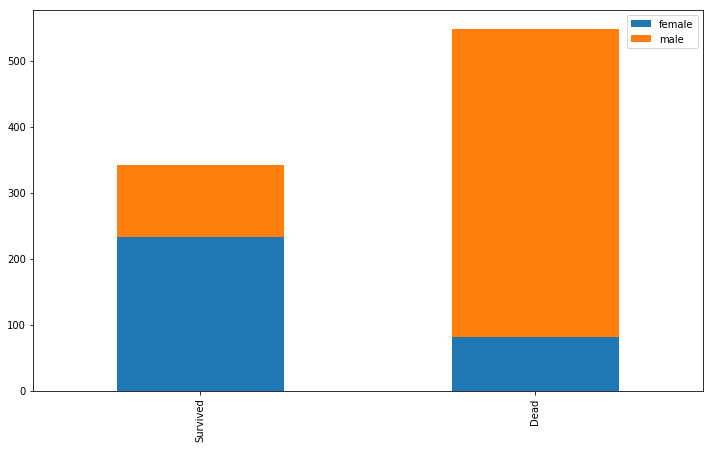

In [9]:
bar_chart('Sex')

Le graphique confirme que les femmes ont plus de chance de survie que les hommes. 

> *** 'Class'***

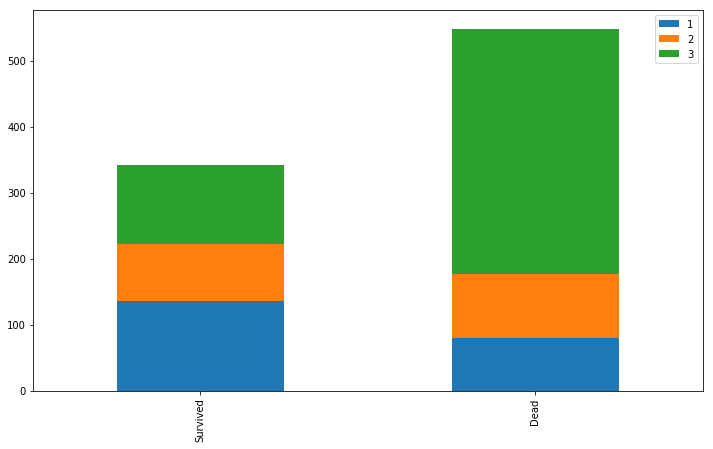

In [10]:
bar_chart('Class')

Le graphique confirme que la 1ère classe a le plus de chance de survie que les autres classes.
Le graphique confirme que la 3ème classe a le plus de chance de mourrir que les autres classes. 

> ***'Embarked'***

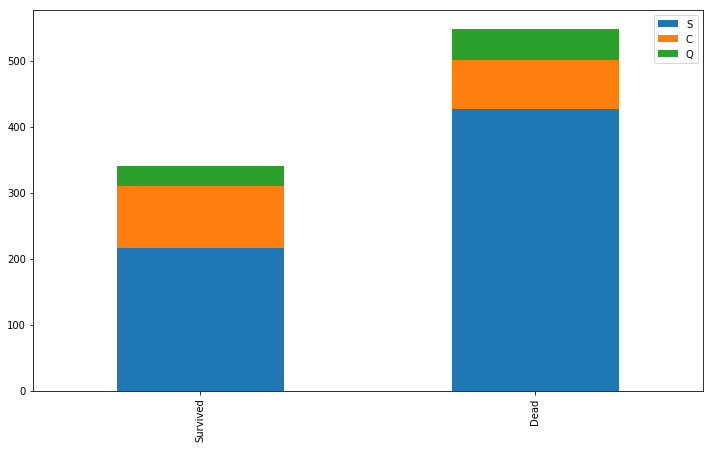

In [11]:
bar_chart('Embarked')

Le graphique confirme qu'une personne embarquée à C a un peu plus de chance de survie.
Le graphique confirme qu'une personne embarquée à Q a plus de chance de mourrir. 

> ***'Age'***

In [12]:
train.head(10)

,PassengerId,Survived,Class,Name,Sex,Age,Horizontal,Vertical,Ticket,Price,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
train['Age'] = train['Age'].fillna(train['Age'].median())
kaggle['Age'] = kaggle['Age'].fillna(kaggle['Age'].median())

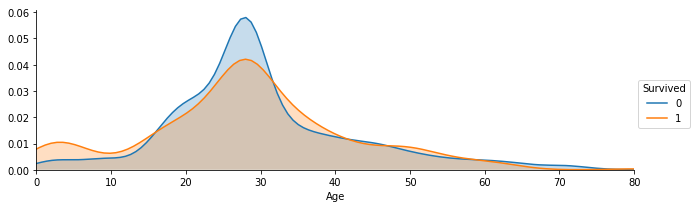

In [14]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show() 

(0, 20)

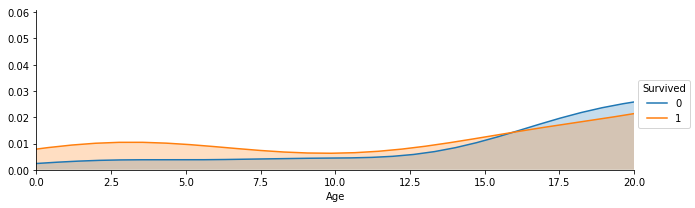

In [15]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20, 30)

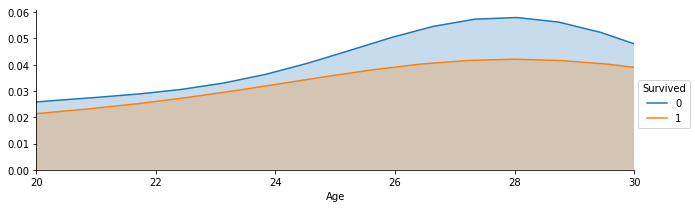

In [16]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30, 60)

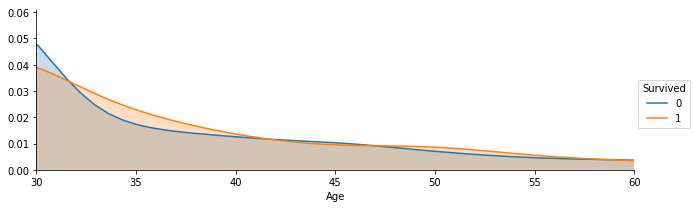

In [17]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 60)

(60, 80)

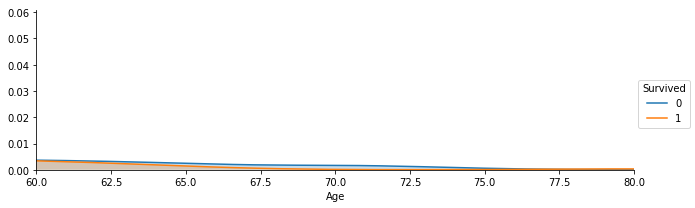

In [18]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60, 80)

> *** Famille Horizontal = frères, soeurs, époux (ancienne colonne 'SibSp')***

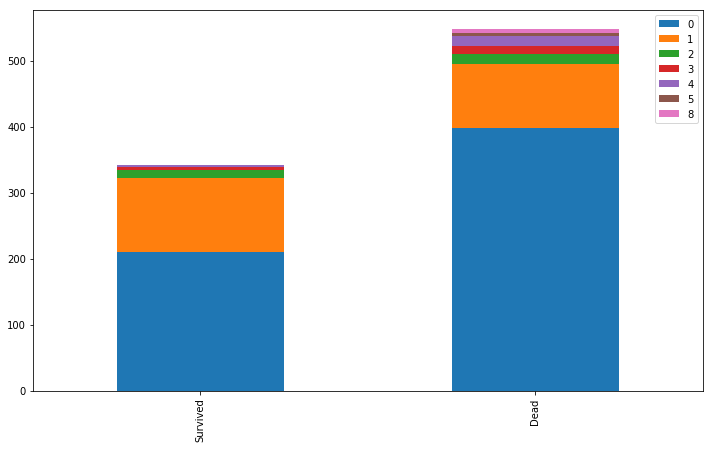

In [19]:
bar_chart('Horizontal')

> ***Famille Vertical = parents ou enfants (ancienne colonne 'Parch')***

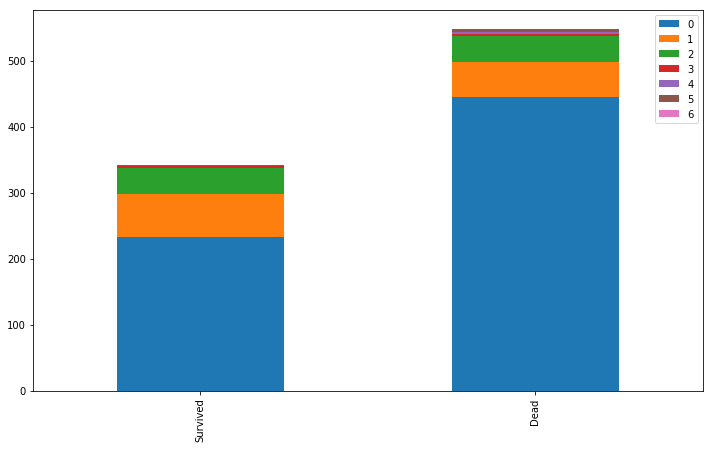

In [20]:
bar_chart('Vertical')

Le graphique confirme qu'une personne à bord avec plus de 2 parents ou enfants a plus de chance de survie. 
Le graphique confirme qu'une personne à bord seule a plus de chance de mourrir. 

> *** Family ***

In [21]:
train["Family"] =  train["Horizontal"] + train["Vertical"] + 1
kaggle["Family"] = kaggle["Horizontal"] + kaggle["Vertical"] + 1

(0, 11.0)

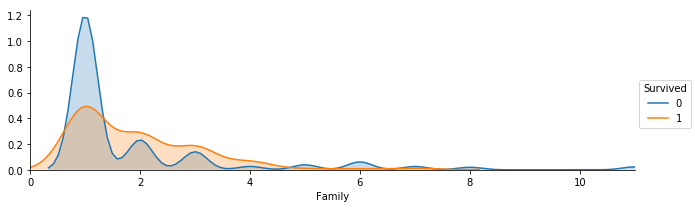

In [22]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Family',shade= True)
facet.set(xlim=(0, train['Family'].max()))
facet.add_legend()
plt.xlim(0)

(0, 4)

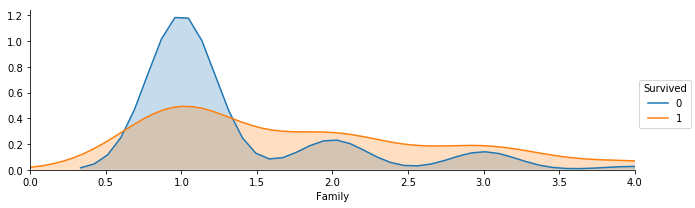

In [23]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Family',shade= True)
facet.set(xlim=(0, train['Family'].max()))
facet.add_legend()
plt.xlim(0,4)

> ***Price : prix payé par un passager (ancienne colonne 'Fare')***

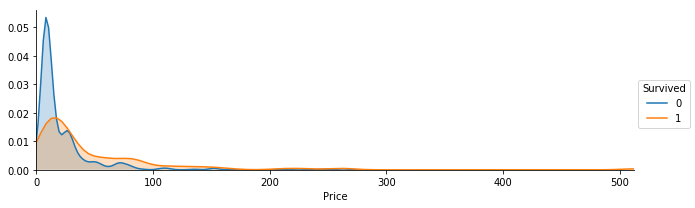

In [24]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot, 'Price',shade= True)
facet.set(xlim=(0, train['Price'].max()))
facet.add_legend()
plt.show()  

(0, 100)

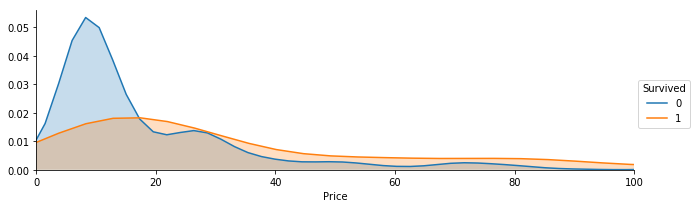

In [25]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot, 'Price',shade= True)
facet.set(xlim=(0, train['Price'].max()))
facet.add_legend()
plt.xlim(0, 100)

# Etape 2 - Feature engineering

> ***Traitement des données des datasets train et test***

***#PARTIE DE NISHA ET ADRIEN A RAJOUTER#***

In [66]:
train = pd.read_csv("train.csv")
kaggle = pd.read_csv("test.csv")
naan = pd.read_csv("naan.csv")
#Suppression de la colonne cabine qui nous est d'aucune utilitée.
train = train.drop("Cabin",axis = 1)
kaggle = kaggle.drop("Cabin",axis = 1)
#on renomme les colonnes afin qu'elles soient plus parlantes.
train = train.rename(index=str, columns={"Pclass": "Class", 
                                 "SibSp": "F/S ou M/F",
                                 "Parch": "P/E",
                                 "Fare": "Price"})

kaggle = kaggle.rename(index=str, columns={"Pclass": "Class", 
                                 "SibSp": "F/S ou M/F",
                                 "Parch": "P/E",
                                 "Fare": "Price"})

kaggle['Price'] = kaggle['Price'].fillna(kaggle['Price'].median())
naan['Price'] = naan['Price'].fillna(naan['Price'].median())

> ***'Sex'***


In [67]:
# on recode la colonne Sex en encondant les nouvelles colonnes H et F
recode = {"male":0,"female":1}
train = train.replace({"Sex":recode})
kaggle = kaggle.replace({"Sex":recode})
train_test = pd.DataFrame(train["Sex"])
kaggle_test = pd.DataFrame(kaggle["Sex"])
train_test = pd.get_dummies(train["Sex"])
kaggle_test = pd.get_dummies(kaggle["Sex"])
train = pd.concat([train,train_test],axis = 1)
train=train.rename(columns = {0:'H',1:'F'})
kaggle = pd.concat([kaggle,kaggle_test],axis = 1)
kaggle=kaggle.rename(columns = {0:'H',1:'F'})

#    Embarked

In [68]:
# On recode la colonne Embarked en encodant les nouvelles colonnes S, C et Q.
mask = train["Embarked"].astype("str") == "nan"
train["Embarked"].loc[mask] = "S"
recode = {'S': 1,'C': 2,'Q': 3}
train = train.replace({'Embarked' : recode})
kaggle = kaggle.replace({'Embarked' : recode})
train_test = pd.DataFrame(train["Embarked"])
kaggle_test = pd.DataFrame(kaggle["Embarked"])
train_test = pd.get_dummies(train["Embarked"])
kaggle_test = pd.get_dummies(kaggle["Embarked"])
train = pd.concat([train,train_test],axis = 1)
train=train.rename(columns = {1:'Southampton',2:'Cherbourg',3:'Queenstown'})
kaggle = pd.concat([kaggle,kaggle_test],axis = 1)
kaggle=kaggle.rename(columns = {1:'Southampton',2:'Cherbourg',3:'Queenstown'})

C:\Users\Adrien Morla\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [69]:
#celà fonctionne malgré ce message d'erreur.

> ***'Age'***

In [70]:
# on ajoute la colonne "age_categ" sur le df train.
def process_age(train,cut_points,label_names):
    train["Age"] = train["Age"].fillna(-0.5)
    train["Age_categories"] = pd.cut(train["Age"],cut_points,labels=label_names)
    return train

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
train = process_age(train,cut_points,label_names)

# on ajoute la colonne "age_categ" sur le df kaggle.
def process_age(kaggle,cut_points,label_names):
    kaggle["Age"] = kaggle["Age"].fillna(-0.5)
    kaggle["Age_categories"] = pd.cut(kaggle["Age"],cut_points,labels=label_names)
    return kaggle

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
kaggle = process_age(kaggle,cut_points,label_names)

In [71]:
#on recode la colonne Age_catégories en encodant les nouvelles colonnes Missing, Infant....
train_test = pd.DataFrame(train["Age_categories"])
kaggle_test = pd.DataFrame(kaggle["Age_categories"])
train_test = pd.get_dummies(train["Age_categories"])
kaggle_test = pd.get_dummies(kaggle["Age_categories"])
train = pd.concat([train,train_test],axis = 1)
train=train.rename(columns = {1:"Missing",2:"Infant",3:"Child",4:"Teenager",5:"Young Adult",6:"Adult",7:"Senior"})
kaggle = pd.concat([kaggle,kaggle_test],axis = 1)
kaggle=kaggle.rename(columns = {1:"Missing",2:"Infant",3:"Child",4:"Teenager",5:"Young Adult",6:"Adult",7:"Senior"})

> ***'Class'***

In [72]:
# on recode la colonne Pclass en encodant les nouvelles colonnes Pclass1, 2 et 3.
train_test = pd.DataFrame(train["Class"])
kaggle_test = pd.DataFrame(kaggle["Class"])
train_test = pd.get_dummies(train["Class"])
kaggle_test = pd.get_dummies(kaggle["Class"])
train = pd.concat([train,train_test],axis = 1)
train=train.rename(columns = {1:'Class1',2:'Class2',3:'Class3'})
kaggle = pd.concat([kaggle,kaggle_test],axis = 1)
kaggle=kaggle.rename(columns = {1:'Class1',2:'Class2',3:'Class3'})

> ***'Titre' ***

In [73]:
# on recode la colonne nom en encodant les nouvelles colonnes des titres.
train["Titre"] = train["Name"].str.extract("([a-zA-Z]+\.)",expand=False)
kaggle["Titre"] = kaggle["Name"].str.extract("([a-zA-Z]+\.)",expand=False)
train_test = pd.DataFrame(train["Titre"])
kaggle_test = pd.DataFrame(kaggle["Titre"])
train_test = pd.get_dummies(train["Titre"])
kaggle_test = pd.get_dummies(kaggle["Titre"])
train = pd.concat([train,train_test],axis = 1)
train=train.rename(columns = {1:'Mr.',2:'Mrs.',3:'Miss.',4:'Master.',5:'Don.',6:'Rev.', 7:'Dr.', 8:'Mme.', 9:'Ms.', 10: 'Major.'
, 11: 'Lady.', 12: 'Sir.', 13: 'Mlle.', 14: 'Col.', 15: 'Capt.',16: 'Countess.', 17: 'Jonkheer.'})
kaggle = pd.concat([kaggle,kaggle_test],axis = 1)
kaggle=kaggle.rename(columns = {1:'Mr.',2:'Mrs.',3:'Miss.',4:'Master.',5:'Don.',6:'Rev.', 7:'Dr.', 8:'Mme.', 9:'Ms.', 10: 'Major.'
, 11: 'Lady.', 12: 'Sir.', 13: 'Mlle.', 14: 'Col.', 15: 'Capt.',16: 'Countess.', 17: 'Jonkheer.'})

In [74]:
# Suppression des valeurs inutiles
train = (train.drop(['Class','Embarked','Sex',"Ticket","Titre"], axis = 1))
kaggle = (kaggle.drop(['Class','Embarked','Sex',"Ticket","Titre"], axis = 1))

In [78]:
print(train)
print(kaggle)

     PassengerId  Survived                                               Name  \
0              1         0                            Braund, Mr. Owen Harris   
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3         1                             Heikkinen, Miss. Laina   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5         0                           Allen, Mr. William Henry   
5              6         0                                   Moran, Mr. James   
6              7         0                            McCarthy, Mr. Timothy J   
7              8         0                     Palsson, Master. Gosta Leonard   
8              9         1  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9             10         1                Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1                    Sandstrom, Miss. Marguerite Rut   
11            12         1  

# Etape 3- Entraînement et prédiction

In [82]:
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

dataX_train = train[['Age','H','F','Class1','Class2','Class3','Price','F/S ou M/F', 'P/E','Southampton','Cherbourg','Queenstown','Col.','Dr.','Master.','Miss.','Mr.','Mrs.','Rev.','Missing',"Infant","Child","Teenager","Young Adult","Adult","Senior"]] 
dataY_train = train['Survived']
dataX_test = kaggle[['Age','H','F','Class1','Class2','Class3','Price','F/S ou M/F', 'P/E','Southampton','Cherbourg','Queenstown','Col.','Dr.','Master.','Miss.','Mr.','Mrs.','Rev.',"Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]]

"""logistic reg"""
data_logistic = linear_model.LogisticRegression()
data_logistic.fit(dataX_train, dataY_train)
data_test_lr = data_logistic.predict(dataX_test)
data_test_lr = pd.DataFrame(data_test_lr)
print('LR:', data_logistic.score(dataX_train, dataY_train))
#print(data_test_lr)
#print(testeur['PassengerId'], data_test_lr)
a = kaggle['PassengerId'].tolist()
#print(a)
df_lr = pd.DataFrame({'PassengerId': a , 'Survived': data_test_lr[0].tolist()})
df_lr.set_index('PassengerId')
df_lr.to_csv('gender_submission.csv', index = None)

#print(data_test_lr.score())

"""Bayesien Naïf"""
gnb = GaussianNB()
data_NBayes = gnb.fit(dataX_train, dataY_train).predict(dataX_test)
print('NB:', gnb.score(dataX_train, dataY_train))

"""Arbre machin"""
data_tree = tree.DecisionTreeClassifier(max_leaf_nodes = 30)

data_DTC = data_tree.fit(dataX_train, dataY_train).predict(dataX_test)
print('Tree:', data_tree.score(dataX_train, dataY_train))
#df_lr = pd.DataFrame({'ID': a , 'Survived': data_DTC})
#df_lr.set_index('ID')
#df_lr.to_csv('gender_submission.csv', index = None)

LR: 0.8282828282828283
NB: 0.7856341189674523
Tree: 0.8843995510662177


In [84]:
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

dataX_train = train[['Age','H','F','Class1','Class2','Class3','Price','F/S ou M/F', 'P/E','Southampton','Cherbourg','Queenstown','Col.','Dr.','Master.','Miss.','Mr.','Mrs.','Rev.']] 
dataY_train = train['Survived']
dataX_test = naan[['Age','H','F','Class1','Class2','Class3','Price','F/S ou M/F', 'P/E','Southampton','Cherbourg','Queenstown','Col.','Dr.','Master.','Miss.','Mr.','Mrs.','Rev.']]

"""logistic reg"""
data_logistic = linear_model.LogisticRegression()
data_logistic.fit(dataX_train, dataY_train)
data_test_lr = data_logistic.predict(dataX_test)
data_test_lr = pd.DataFrame(data_test_lr)
print('LR:', data_logistic.score(dataX_train, dataY_train))
#print(data_test_lr)
#print(testeur['PassengerId'], data_test_lr)
a = naan['PassengerId'].tolist()
#print(a)
df_lr = pd.DataFrame({'PassengerId': a , 'Survived': data_test_lr[0].tolist()})
df_lr.set_index('PassengerId')
df_lr.to_csv('gender_submission.csv', index = None)

#print(data_test_lr.score())

"""Bayesien Naïf"""
gnb = GaussianNB()
data_NBayes = gnb.fit(dataX_train, dataY_train).predict(dataX_test)
print('NB:', gnb.score(dataX_train, dataY_train))

"""Arbre machin"""
data_tree = tree.DecisionTreeClassifier(max_leaf_nodes = 30)

data_DTC = data_tree.fit(dataX_train, dataY_train).predict(dataX_test)
print('Tree:', data_tree.score(dataX_train, dataY_train))
df_lr = pd.DataFrame({'PassengerId': a , 'Survived': data_DTC})
df_lr.set_index('PassengerId')
df_lr.to_csv('gender_submission_naan.csv', index = None)

LR: 0.8282828282828283
NB: 0.7811447811447811
Tree: 0.8843995510662177


# Etape 4 - Solutions d'amélioration


1) Rajouter des données en transformant les types string ( fillna, one-hot encoding, ...)
2) Essayer d'autres algos (SVM, K-nearest, K-mean, neural network , XGBoost...) 
3) Utiliser la cross-validation
4) Random forest: réduire le nombre d'embranchement
5) Regularisation pour réduire l'overfitting